In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
class LinearRegression:
    def __init__(self, reg_param = 0.0, learning_rate = 0.001, verbose = False):
        self.reg_param = reg_param
        self.learning_rate = learning_rate
        self.verbose = verbose

    def fit(self, X, y):
        self.X = np.array(X)
        self.y = np.array(y)


        if len((self.X).shape) == 1: #That is if it is a rank 1 vector
            self.m = len(self.X)
            self.n = 1
            self.X = (self.X).reshape(self.m,1)

        else:
            self.m, self.n = (self.X).shape()
            self.X = (self.X).reshape(self.m,self.n)

        self.X = np.concatenate([np.ones(self.m).reshape(self.m,1), self.X], axis = 1)
        self.y = (self.y).reshape(self.m,1)

        self.theta = np.zeros(self.n+1).reshape(self.n+1,1)
        J_prev = 1
        J = 0
        iteration = 0

        while abs(J_prev - J) > 0:
            J_prev = J
            J = self.cost()
            
            self.theta = self.theta - self.learning_rate * self.gradient()
            if self.verbose:
                print("Iteration #{}".format(iteration))
                print("Cost = {}".format(J))
                print("Gradient = {}".format(self.gradient()))
                print("Theta = {}".format(self.theta))
                print()
            iteration += 1

        print("Training Ended!")

    def cost(self):
        h_theta = self.X@self.theta
        error = h_theta - self.y
        return (1/(2*self.m)) * np.sum(error.T @ error) + self.reg_param/(2*self.m) * np.sum(self.theta[1:].T@self.theta[1:])
    
    def gradient(self):
        h_theta = self.X@self.theta
        error = h_theta - self.y
        return (1/self.m) * (self.X).T @ error + self.reg_param/self.m * np.sum(self.theta[1:])

    def predict(self):
        return self,X @ self.theta

In [15]:
number_of_examples = 50
points = np.matrix([np.array([i for i in range(number_of_examples)]), np.array([0.4*i+3+6*np.random.random() for i in range(number_of_examples)])]).T
df = pd.DataFrame(points, columns = ['X', 'y'])
df

,X,y
0,0.0,6.764391
1,1.0,8.330342
2,2.0,9.180217
3,3.0,8.774957
4,4.0,5.894996
5,5.0,6.090705
6,6.0,6.344027
7,7.0,6.253888
8,8.0,7.897454
9,9.0,10.865864


In [16]:
X = df['X']
y = df['y']

In [29]:
model = LinearRegression() # Noticed a huge increase in time with verbose = True so lets keep it False
model.fit(X,y)

Training Ended!


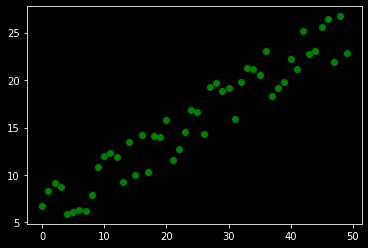

In [30]:
plt.plot(df['X'],df['y'], 'go')

In [31]:
model.theta

array([[6.20895919],
       [0.39513549]])

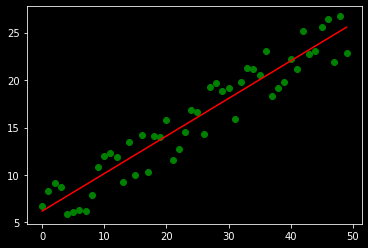

In [28]:
#PLOT
plt.style.use('dark_background')
xplt = np.array([i for i in range(number_of_examples)])
slope = np.sum(model.theta[1])
intercept = np.sum(model.theta[0])
yplt = slope*xplt + intercept
plt.plot(df['X'],df['y'], 'go')
plt.plot(xplt, yplt, 'r-')